In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model

#### Function to check any new image:

In [25]:
def is_leaf_from_mbmu(img_path, model, threshold=0.03, size=(128, 128)):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Error loading image")
        return None
    img = cv2.resize(img, size)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=(0, -1))  # (1, 128, 128, 1)

    reconstructed = model.predict(img)
    error = np.mean(np.abs(img - reconstructed))
    
    print(f"Reconstruction Error: {error:.5f}")
    
    plt.figure(figsize=(8, 4))

    # Original
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(img[0, :, :, 0], cmap='gray')
    plt.axis('off')

    # Reconstructed
    plt.subplot(1, 2, 2)
    plt.title("Reconstructed")
    plt.imshow(reconstructed[0, :, :, 0], cmap='gray')
    plt.axis('off')

    plt.show()
    
    return error < threshold  # True = from MBMU, False = anomaly


# Load the Models

In [26]:
# Later, LOAD the model
unet_autoencoder = load_model("leaf_unet_autoencoder.h5")
convolutional_autoencoder = load_model("leaf_convolutional_autoencoder.h5")

#### Usage:

In [29]:
test_img = r"Dataset\Gulmohar\IMG20250212140028.jpg"  # Path to your test image

Showing the results of the result_unet_autoencoder
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Reconstruction Error: 0.00532


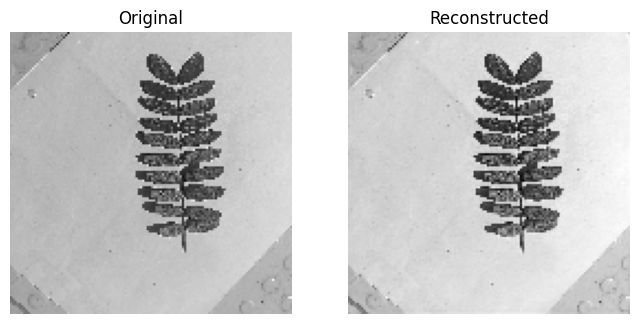

✅ From MBMU Campus
------------------------------------------------------------------------
Showing the results of the result_convolutional_autoencoder
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Reconstruction Error: 0.02660


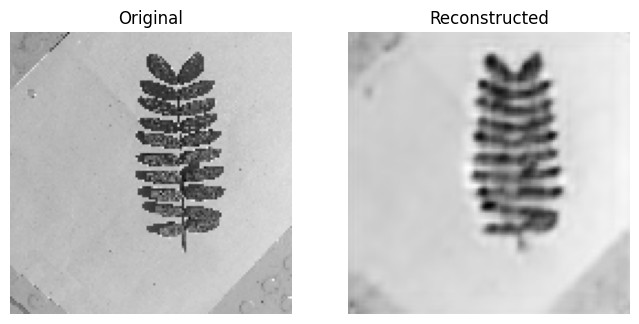

✅ From MBMU Campus


In [30]:
print("Showing the results of the result_unet_autoencoder")
result_unet_autoencoder = is_leaf_from_mbmu(img_path=test_img , model=unet_autoencoder, threshold=0.03, size=(128, 128))
print("✅ From MBMU Campus" if result_unet_autoencoder else "❌ Not from MBMU")

print("------------------------------------------------------------------------")

print("Showing the results of the result_convolutional_autoencoder")
result_convolutional_autoencoder = is_leaf_from_mbmu(img_path=test_img , model=convolutional_autoencoder, threshold=0.03, size=(128, 128))
print("✅ From MBMU Campus" if result_convolutional_autoencoder else "❌ Not from MBMU")